# Preparing the environment

## Graphics and plotting

The following block of code initializes the Python plotting library [matplotlib](http://matplotlib.org/gallery.html) and configures it to show figures embedded in the notebook (as opposed to opening a new window for each figure):

In [178]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

The Seaborn library provides easy-to-use plotting functions for common plot types, and better default visual styles.

In [179]:
import seaborn as sea

Set the default size and style of the plot.  (Plots are styled to [look like R's `ggplot`](http://tonysyu.github.io/mpltools/auto_examples/style/plot_ggplot.html) library.)

In [180]:
matplotlib.rcParams['figure.figsize'] = (10, 7)

sea.set_style('dark')

Also make the NumPy library available (without it, some features of Matplotlib and -especially- Seaborn) will *not* work:

In [181]:
import numpy as np

## SQL database connection

The ESC403 cluster comes preinstalled with [Catherine Devlin's `%sql`-magic for IPython][1]; this allows you to run SQL queries from the IPython notebook, and intermix them with Python code.

[1]: https://github.com/catherinedevlin/ipython-sql

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code

In [5]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement (the `rmurri@/equidistantpoints` syntax means "connect to the PostGreSQL DB named `equidistantpoints` running on *this* host as user `rmurri`" -- of course change `rmurri` to *your* user name):

In [6]:
%sql postgresql://muesim@/equidistantpoints

u'Connected: muesim@equidistantpoints'

This database contains the [Equidistant Geographic Grid Points and Modern Climate](http://mypage.iu.edu/~pdpolly/Data.html) dataset (this the "extended North American data" in the words of the source website), see the [original publication](http://mypage.iu.edu/~pdpolly/Data.html) for details.

We are going to use only the "temperature" table in the following. (But feel free to experiment with the others!)

In [7]:
%sql select * from natempwilmott limit 3;

3 rows affected.


id,longitude,latitude,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,ann
6,-79.46900,82.81348,-35.00000,-37.00000,-33.00000,-24.90000,-10.00000,0.30000,3.30000,1.40000,-9.00000,-20.70000,-28.80000,-32.50000,-18.90000
7,-75.87860,82.81348,-35.00000,-37.10000,-32.80000,-24.70000,-9.90000,0.10000,3.30000,1.40000,-9.20000,-20.90000,-28.80000,-32.30000,-18.80000
8,-72.28820,82.81348,-34.90000,-36.90000,-32.70000,-24.60000,-9.90000,-0.10000,3.20000,1.30000,-9.50000,-20.90000,-28.80000,-32.00000,-18.80000


----

# Interactive plotting

Jupyter/IPython provides facilities for making interactive visualizations in the notebook.

The general schema for making an interactive visualization is:

1. Make a function that takes the interactively-settable parameters as arguments, and returns a "plot" (or any other object that can be shown in the notebook).
2. Decorate this function with the `@interact` annotation, providing initial values for all interactively-settable parameters.

All relevant code lives in Python module `ipywidgets`:

In [8]:
from ipywidgets import interact, FloatSlider, Select, Dropdown

The following example shows how to create an interactive sine wave plot (see [here](http://earthpy.org/pyncview_pm.html)).  Note how IPython automatically detects the parameter type and uses a slider to set floating-point values and a text-box for the `color` parameter:

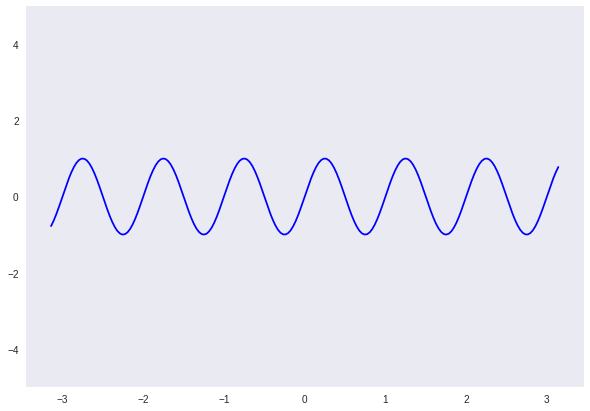

In [9]:
@interact(freq=1.0, amp=1.0, color='blue')
def wave(freq, amp, color):
    xs = np.linspace(-np.pi, +np.pi, 200)
    ys = np.sin(2*np.pi*freq*xs) * amp
    ax = plt.gca()
    ax.plot(xs, ys, color=color)
    ax.set_ylim([-5., +5.])
    return ax

However, with auto-detection we cannot constrain the input values: e.g., we cannot set the valid range of inputs, nor restrict the color selection.  It is possible to explicitly instanciate the widget to use for setting a parameter from a [large Widget list](http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

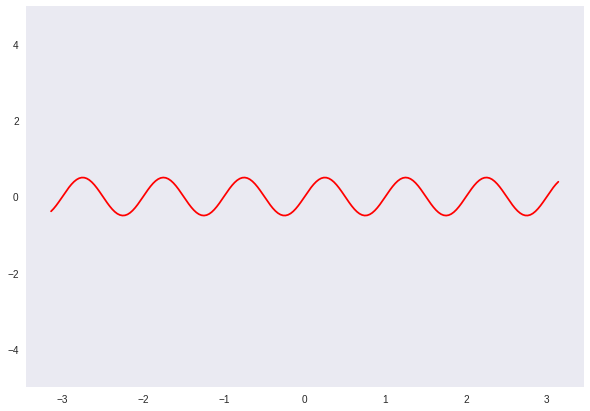

In [21]:
@interact(freq=1.0, 
          amp=FloatSlider(min=0.5, max=5.0, step=0.1), 
          color=Select(options=['red', 'green', 'blue'], description='color'))
def wave(freq, amp, color):
    xs = np.linspace(-np.pi, +np.pi, 200)
    ys = np.sin(2*np.pi*freq*xs) * amp
    ax = plt.gca()
    ax.plot(xs, ys, color=color)
    ax.set_ylim([-5., +5.])
    return ax

Using slider widgets often results in screen flickering (redrawing the plot is slower than just moving a slide).  The `continuous_update=False` argument can be added to the slider to only re-paint upon mouse button release.

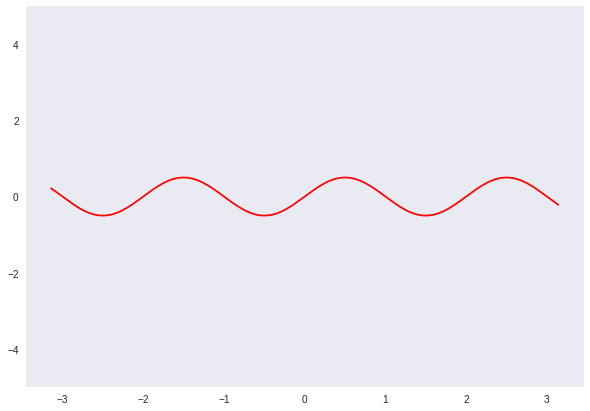

In [23]:
@interact(freq=FloatSlider(min=0.5, max=5.0, step=0.1, continuous_update=False), 
          amp=FloatSlider(min=0.5, max=5.0, step=0.1, continuous_update=False), 
          color=Select(options=['red', 'green', 'blue'], description='color'))
def wave(freq, amp, color):
    xs = np.linspace(-np.pi, +np.pi, 200)
    ys = np.sin(2*np.pi*freq*xs) * amp
    ax = plt.gca()
    ax.plot(xs, ys, color=color)
    ax.set_ylim([-5., +5.])
    return ax

----

## 1. Make an interactive plot of the earth surface: viewport is selected using sliders

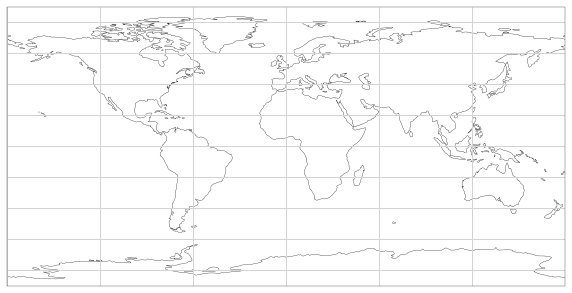

In [35]:
import cartopy
import cartopy.crs

'''Plots a certain region of the world map in the range of the chosen given longitude/latitude. Initially
   draws the whole world map.'''

plain_crs = cartopy.crs.PlateCarree()
@interact(longitude_start=FloatSlider(value=-180, min=-180, max=180, step=1, contiunous_update=False),
          longitude_end=FloatSlider(value=180, min=-180, max=180, step=1, continuous_update=False),
          latitude_start=FloatSlider(value=-90, min=-90, max=90, step=1, continuous_update=False),
          latitude_end=FloatSlider(value=90, min=-90, max=90, step=1, continuous_update=False))
def earthsurface(longitude_start, longitude_end, latitude_start, latitude_end):
    ax = plt.subplot(111, projection=plain_crs)
    ax.set_extent((longitude_start, longitude_end, latitude_start, latitude_end), crs=plain_crs)
    ax.gridlines(color='lightgrey', linestyle='-')
    ax.coastlines()

## 2. Make an interactive plot of average temperatures in NA: month should be selectable

8509 rows affected.


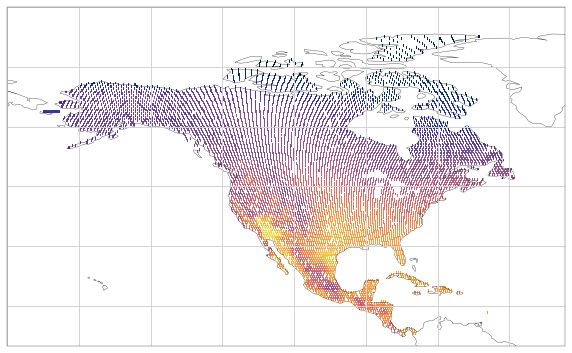

In [209]:
import cmocean
cm_thermal = cmocean.cm.thermal

@interact(month=Select(options=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                       description='Month'))
def get_data(month):
    '''
    This implementation is quite ugly -- perhaps one could define a user created SQL function to allow
    choosing a specific month. 
    
    Notes:
    - One way around the %sql limitation would be to use the DB-API 2.x library which can handle SQL
    - For a different way to do it see solutions: We create a 3-dim array Temperature(Month) x Long x Lat 
    '''
    if month == 'Jan':
        data = %sql SELECT longitude, latitude, jan FROM natempwilmott
    elif month == 'Feb':
        data = %sql SELECT longitude, latitude, feb FROM natempwilmott
    elif month == 'Mar':
        data = %sql SELECT longitude, latitude, mar FROM natempwilmott
    elif month == 'Apr':
        data = %sql SELECT longitude, latitude, apr FROM natempwilmott
    elif month == 'May':
        data = %sql SELECT longitude, latitude, may FROM natempwilmott
    elif month == 'Jun':
        data = %sql SELECT longitude, latitude, jun FROM natempwilmott
    elif month == 'Jul':
        data = %sql SELECT longitude, latitude, jul FROM natempwilmott
    elif month == 'Aug':
        data = %sql SELECT longitude, latitude, aug FROM natempwilmott
    elif month == 'Sep':
        data = %sql SELECT longitude, latitude, sep FROM natempwilmott
    elif month == 'Oct':
        data = %sql SELECT longitude, latitude, oct FROM natempwilmott
    elif month == 'Nov':
        data = %sql SELECT longitude, latitude, nov FROM natempwilmott
    elif month == 'Dec':
        data = %sql SELECT longitude, latitude, dec FROM natempwilmott
    elif mont == 'year':
        data = %sql SELECT longitude, latitude, ann FROM natempwilmott
    
    lon, lat, _ = zip(*data)
    lon = np.sort(list(set(lon)))
    lat = np.sort(list(set(lat)))
    n_lon = len(lon)
    n_lat = len(lat)
    temp_data = np.empty([n_lon, n_lat])
    temp_mask = np.full(temp_data.shape, True, dtype=np.bool)
    
    lon_to_index = {value:idx for idx, value in enumerate(lon)}
    lat_to_index = {value:idx for idx, value in enumerate(lat)}
    
    for x, y, value in data:
        i = lon_to_index[x]
        j = lat_to_index[y]
        temp_data[i, j] = float(value)
        temp_mask[i, j] = False
    
    temp = np.ma.array(temp_data, mask=temp_mask)
    xs = np.array(lon, dtype=np.float)
    ys = np.array(lat, dtype=np.float)

    ax = plt.subplot(111, projection=plain_crs)
    ax.set_extent((-180, -40, 5, 90), crs=plain_crs)
    ax.gridlines(color='lightgrey', linestyle='-')
    ax.pcolormesh(xs, ys, temp.T, transform=plain_crs, cmap=cm_thermal)
    ax.coastlines()